#### <font color = blue> Electricity Supply and Demand Analysis in Ontario </font>
In this project, we will conduct data analysis on datasets collected
from *Independent Electricity System Operator* in Ontario, Canada. 

This non-profit corporation manages Ontario's electricity grid in real-time. 

<a href="https://www.ieso.ca/power-data/data-directory" target="_blank">Datasets on IESO</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import  LabelSet, ColumnDataSource
from bokeh.layouts import column
from bokeh.palettes import Category10
from bokeh.models import DatetimeTickFormatter
from bokeh.models import Legend
from bokeh.transform import cumsum
from math import pi
import matplotlib.dates as mdates
from bokeh.layouts import gridplot


In [2]:
# Read the CSV file, skipping the first 3 rows.
df_demand = pd.read_csv("CleanTechData/PUB_Demand.csv", skiprows=3)
df_demand.head()

,Date,Hour,Market Demand,Ontario Demand
0,2025-01-01,1,17247,13887
1,2025-01-01,2,17355,13722
2,2025-01-01,3,17638,13688
3,2025-01-01,4,17065,13613
4,2025-01-01,5,17498,13593


In [3]:
# Check the ranges of the dates
date_min = df_demand['Date'].min()
date_max = df_demand['Date'].max()

print("Date range:", date_min, "to", date_max)


Date range: 2025-01-01 to 2025-09-04


**Market Demand vs Ontario Demand**

- **Market Demand:** Total electricity demand seen by the market, including Ontario and exports to neighboring regions.  
- **Ontario Demand:** Electricity demand consumed within Ontario only, excluding exports.  
- **Difference:** Market Demand−Ontario Demand=Transmission Losses+Net Exports

Transmission losses: energy lost while transporting electricity from generators to end users.

Net exports: energy sent to other regions outside Ontario. 
 
- Understanding this difference helps in grid planning, efficiency analysis, and forecasting.

In [4]:
# Convert Date column to datetime
df_demand['Date'] = pd.to_datetime(df_demand['Date'])

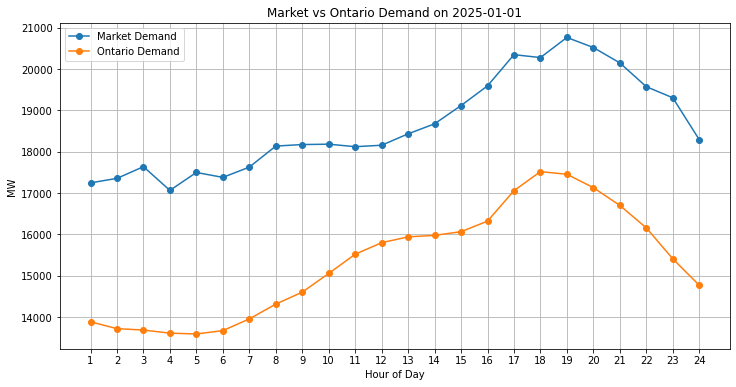

In [5]:
# ---- Plot for a single day ----
day = "2025-01-01"
df_demand_day = df_demand[df_demand['Date'] == day]
plt.figure(figsize=(12,6))
plt.plot(df_demand_day['Hour'], df_demand_day['Market Demand'], label='Market Demand', marker='o')
plt.plot(df_demand_day['Hour'],df_demand_day['Ontario Demand'], label='Ontario Demand',marker='o')
plt.xticks(df_demand_day['Hour'])
plt.xlabel("Hour of Day")
plt.ylabel("MW")
plt.title(f"Market vs Ontario Demand on {day}")
plt.legend()
plt.grid(True)
plt.show()

##### Peak vs. Off-Peak Demand

- Peak demand hours: 17:00–19:00.

- Off-Peak demand: night hours 4:00–6:00

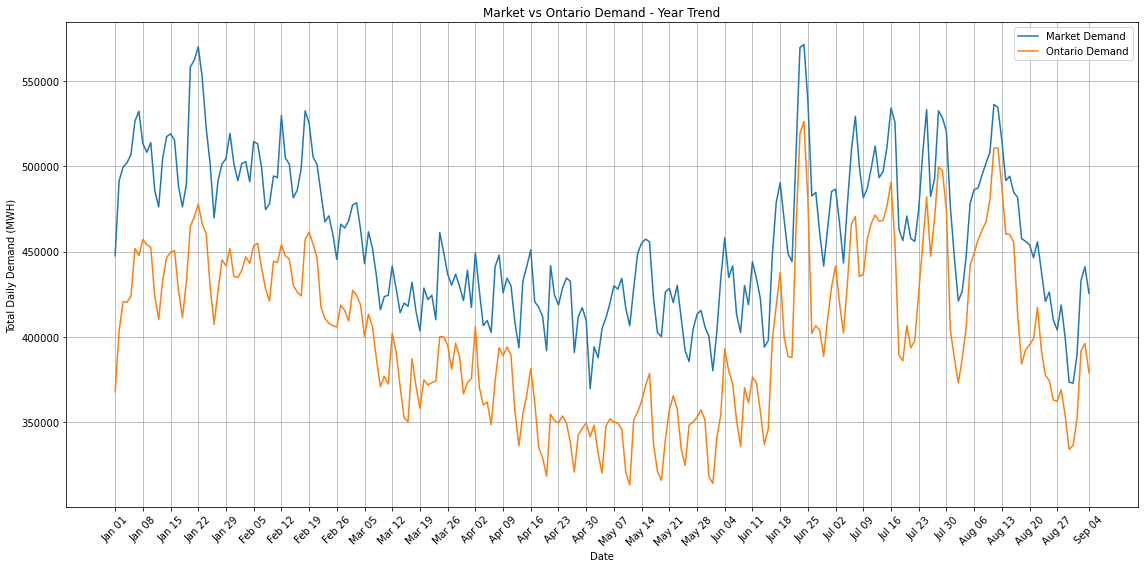

In [6]:
# ---- Plot for whole year (daily avg) ----
df_demand_daily = df_demand.groupby('Date').sum().reset_index()
df_demand_daily['Date'] = pd.to_datetime(df_demand_daily['Date'])

plt.figure(figsize=(16,8))
plt.plot(df_demand_daily['Date'], df_demand_daily['Market Demand'], label='Market Demand')
plt.plot(df_demand_daily['Date'], df_demand_daily['Ontario Demand'], label='Ontario Demand')
plt.xlabel("Date")
plt.ylabel("Total Daily Demand (MWH)")
plt.title("Market vs Ontario Demand - Year Trend")
plt.legend()
plt.grid(True)


# --- Set custom x-axis ticks: 4 per month ---
dates = df_demand_daily['Date']
# Calculate indices for 4 ticks per month
# Or pick roughly equally spaced ticks
num_ticks = 36  # 4 per month * 9 months
tick_indices = np.linspace(0, len(dates)-1, num_ticks, dtype=int)
tick_dates = dates.iloc[tick_indices]

plt.xticks(tick_dates, [d.strftime('%b %d') for d in tick_dates], rotation=45)

plt.tight_layout()
plt.show()

#### Ontario demand peaks during the summer months (June–August) in 2025, likely due to air conditioning. Winter months have high demand too, but lower than the summer peak in this year.

In [7]:
# Let's check the demand for august only
august_demand = df_demand[df_demand["Date"].dt.month == 8]
print(august_demand)


           Date  Hour  Market Demand  Ontario Demand
5086 2025-08-01     1          17170           13990
5087 2025-08-01     2          16676           13534
5088 2025-08-01     3          16700           13423
5089 2025-08-01     4          16835           13216
5090 2025-08-01     5          16765           13452
...         ...   ...            ...             ...
5825 2025-08-31    20          17458           16192
5826 2025-08-31    21          17058           15641
5827 2025-08-31    22          16684           14934
5828 2025-08-31    23          15746           14104
5829 2025-08-31    24          15079           13268

[744 rows x 4 columns]


In [8]:
output_notebook()
grid_figs = []

for year in range(2002, 2026, 3):
    demand_year = pd.read_csv("CleanTechData/Demands 2002 - 2025/PUB_Demand_"+ str(year)+".csv", skiprows=3)
    # ---- Plot for whole year (daily avg) ----
    demand_daily = demand_year.groupby('Date').sum().reset_index()
    demand_daily['Date'] = pd.to_datetime(demand_daily['Date'])
    p = figure(title=f"Market vs Ontario Demand - Year {year}",
                  x_axis_type="datetime",
                  plot_width=300, plot_height=200)

    p.line(demand_daily["Date"], demand_daily["Market Demand"], 
              color="blue", line_width=1)
    p.line(demand_daily["Date"], demand_daily["Ontario Demand"], 
              color="red", line_width=1)

    p.xaxis.axis_label = "Date"
    p.yaxis.axis_label = "Total Daily Demand (MWh)"

      # Smaller font sizes
    p.title.text_font_size = "8pt"
    p.title.align = "center"
    p.xaxis.major_label_text_font_size = "5pt"
    p.yaxis.major_label_text_font_size = "5pt"
    p.xaxis.axis_label_text_font_size = "5pt"
    p.yaxis.axis_label_text_font_size = "5pt"

    p.grid.visible = True
    grid_figs.append(p)

# Arrange in grid layout
num_cols = 2   # adjust columns as you like (2 or 3 works well)
grid = gridplot(grid_figs, ncols=num_cols)
show(grid)

Loading BokehJS ...

In [9]:
output_notebook()

# --- Load all years ---
years = list(range(2002, 2026))
year_labels = [str(y) for y in years]  # define labels separately

avg_values = []
for year in range(2002, 2026):
    demand_year = pd.read_csv("CleanTechData/Demands 2002 - 2025/PUB_Demand_"+ str(year)+".csv", skiprows=3)
    average_demand_year = demand_year['Ontario Demand'].mean()
    avg_values.append(average_demand_year)
    print(str(year)+"------"+str(average_demand_year))
# --- Build Bokeh Column Plot ---
p = figure(x_range=year_labels, 
           plot_width=550, plot_height=250,title="Annual Average Ontario Demand")

p.vbar(x=year_labels, top=avg_values, width=0.8, color="seagreen")

# Axis labels
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Total Ontario Demand (MW)"

p.title.align = "center"
p.xaxis.major_label_text_font_size = "5pt"
p.yaxis.major_label_text_font_size = "5pt"
p.xaxis.axis_label_text_font_size  = "5pt"
p.yaxis.axis_label_text_font_size  = "5pt"


# Show grid & plot
p.grid.visible = True
show(p)    


Loading BokehJS ...

2002------17512.392517006803
2003------17319.57420091324
2004------17467.778916211293
2005------17919.13470319635
2006------17243.639383561644
2007------17375.072716894978
2008------16925.764116575592
2009------15886.484474885845
2010------16232.285502283105
2011------16149.632420091324
2012------16084.66689435337
2013------16065.84292237443
2014------15959.340753424658
2015------15640.614155251142
2016------15595.371926229509
2017------15078.880365296804
2018------15689.103424657535
2019------15422.540525114155
2020------15052.985428051003
2021------15279.019406392694
2022------15704.322488584476
2023------15654.192237442923
2024------15985.561361566484
2025------16738.83004423273


In [10]:
# Read the CSV file for power generation, skipping the first 3 rows.
df_generation = pd.read_csv("CleanTechData/supply 2019 - 2025 (August)/" \
"PUB_GenOutputCapabilityMonth_202508.csv", skiprows=3, index_col=False)
df_generation.head()


,Delivery Date,Generator,Fuel Type,Measurement,Hour 1,Hour 2,Hour 3,Hour 4,Hour 5,Hour 6,...,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23,Hour 24
0,2025-08-01,ABKENORA,HYDRO,Capability,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
1,2025-08-01,ABKENORA,HYDRO,Output,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13
2,2025-08-01,ADELAIDE,WIND,Available Capacity,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
3,2025-08-01,ADELAIDE,WIND,Forecast,10,13,14,12,6,4,...,16,30,34,37,31,22,22,17,18,17
4,2025-08-01,ADELAIDE,WIND,Output,11,14,15,12,6,3,...,18,34,36,39,30,23,22,18,19,18


In [11]:
# Filter only Output rows, because it shows actual generation
df_gen_output = df_generation[df_generation['Measurement'] == "Output"]

# Convert the date
df_gen_output["Delivery Date"] = pd.to_datetime(df_gen_output["Delivery Date"])

# Reshape the def_gen_output so that hourly_outputs will be in 1 column
df_gen_long = df_gen_output.melt(
    id_vars=["Delivery Date", "Generator", "Fuel Type"], 
    value_vars=[f"Hour {i}" for i in range(1, 25)],
    var_name="Hour", 
    value_name="Output"
)

# Clean Hour column (turn "Hour 1" → 1, etc.)
df_gen_long["Hour"] =df_gen_long["Hour"].str.replace("Hour ", "").astype(int)

# Convert the Output
df_gen_long["Output"] = pd.to_numeric(df_gen_long["Output"], errors="coerce").astype("Int64")

df_gen_long.head()


C:\Users\tania\AppData\Local\Temp/ipykernel_13988/3141476816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen_output["Delivery Date"] = pd.to_datetime(df_gen_output["Delivery Date"])


,Delivery Date,Generator,Fuel Type,Hour,Output
0,2025-08-01,ABKENORA,HYDRO,1,13
1,2025-08-01,ADELAIDE,WIND,1,11
2,2025-08-01,AGUASABON,HYDRO,1,21
3,2025-08-01,ALEXANDER,HYDRO,1,43
4,2025-08-01,AMARANTH,WIND,1,61


In [12]:
# We don't need name of the generator, just type of Fuel is enough
#df_gen_long =df_gen_long.drop('Generator', axis=1)
#filter = df_gen_long[(df_gen_long['Delivery Date'] == '2025-08-01')  & (df_gen_long['Hour'] == 1)  & ((df_gen_long['Fuel Type'] == 'BIOFUEL'))]
#print(filter['Output'].sum())

# Group by Date, Fuel Type, Hour
hourly_supply = df_gen_long.groupby(["Delivery Date", "Fuel Type",'Hour'])["Output"].sum().reset_index()
print(hourly_supply)


     Delivery Date Fuel Type  Hour  Output
0       2025-08-01   BIOFUEL     1      19
1       2025-08-01   BIOFUEL     2      18
2       2025-08-01   BIOFUEL     3      17
3       2025-08-01   BIOFUEL     4      17
4       2025-08-01   BIOFUEL     5      17
...            ...       ...   ...     ...
5203    2025-08-31      WIND    20     174
5204    2025-08-31      WIND    21     192
5205    2025-08-31      WIND    22     264
5206    2025-08-31      WIND    23     313
5207    2025-08-31      WIND    24     357

[5208 rows x 4 columns]


In [13]:
# Aggregate Daily Totals for each fuel type
daily_supply = df_gen_long.groupby(["Delivery Date", "Fuel Type"])["Output"].sum().reset_index()

# Convert nullable integers to regular ints, filling NaNs with 0
daily_supply['Output'] = daily_supply['Output'].fillna(0).astype(int)

# Or, if float is okay
daily_supply['Output'] = daily_supply['Output'].astype(float)

daily_supply.head(14)

,Delivery Date,Fuel Type,Output
0,2025-08-01,BIOFUEL,766.0
1,2025-08-01,GAS,108814.0
2,2025-08-01,HYDRO,105563.0
3,2025-08-01,NUCLEAR,206803.0
4,2025-08-01,OTHER,226.0
5,2025-08-01,SOLAR,3247.0
6,2025-08-01,WIND,18988.0
7,2025-08-02,BIOFUEL,595.0
8,2025-08-02,GAS,91988.0
9,2025-08-02,HYDRO,103228.0


#### Daily power output (time series) in August for each fuel

In [14]:
# Converts the DataFrame into a Bokeh-compatible format.
source = ColumnDataSource(daily_supply)
p = figure(x_axis_type="datetime", title="Daily Supply by Fuel Type (August)",
           plot_width=600, plot_height=400)

# Pick a# Define palettes and markers
colors = Category10[10]  # up to 10 distinct colors
markers = ["circle", "square", "triangle", "diamond", 
           "inverted_triangle", "cross", "x", "asterisk", "plus"]

# Plot each fuel type with a different color
for i, fuel in enumerate(daily_supply["Fuel Type"].unique()):
    fuel_data = daily_supply[daily_supply["Fuel Type"] == fuel]
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]

    # Line
    p.line(
        fuel_data["Delivery Date"],
        fuel_data["Output"],
        legend_label=fuel,
        line_width=2,
        color=color,
        alpha=0.8,
    )
    # Marker (paired with same color)
    p.scatter(
        fuel_data["Delivery Date"],
        fuel_data["Output"],
        marker=marker,
        size=4,
        color=color,
        alpha=0.9,
    )
    
# --- Axis formatting ---
p.xaxis.axis_label = "Dates in August"
p.yaxis.axis_label = "Energy in MWH"

# Show more x-ticks (instead of only 4)
p.xaxis.formatter = DatetimeTickFormatter(days="%b %d")
p.xaxis.major_label_orientation = 0.8
p.xaxis.ticker.desired_num_ticks = len(daily_supply["Delivery Date"].unique()) // 2

# Move legend out of plot area
p.add_layout(p.legend[0], 'above')
p.legend.orientation = "horizontal"
p.legend.label_text_font_size = "8pt"

output_notebook()
show(p)    

Loading BokehJS ...

#### Total output over the whole month (August) per fuel

In [15]:
#Step 1: Aggregate totals by fuel
monthly_totals = daily_supply.groupby("Fuel Type")["Output"].sum().reset_index()
monthly_totals.head(7)

,Fuel Type,Output
0,BIOFUEL,41214.0
1,GAS,3370677.0
2,HYDRO,2848567.0
3,NUCLEAR,6893670.0
4,OTHER,22200.0
5,SOLAR,81019.0
6,WIND,636942.0


In [16]:
def draw_pi(monthly_totals, year):
    #Step 2: Convert to dict for pie chart
    data = monthly_totals.copy()
    data['angle'] = data['Output']/data['Output'].sum() * 2*pi
    data['color'] = Category10[len(data)]
    
    data['percent'] = (data['Output'] / data['Output'].sum() * 100).round(1).astype(str) + "%"
    # Make legend labels: "FuelType (xx.x%)"
    data['legend_label'] = data['Fuel Type'] + " (" + data['percent'] + ")"
    
    # Convert to ColumnDataSource only after all math is done
    source = ColumnDataSource(data)
      
    # Step 3: Create pie figure, reduce white space
    p_pie = figure(
        height=300,        # bigger height
        width=470,         # bigger width
        title="Total Power Output by Fuel, Year = 20"+ str(year),
        toolbar_location=None,
        tools="hover",
        tooltips="@{Fuel Type}: @{Output}",
        x_range=(-0.6, 1.2),
        y_range=(-3.5, 3.2)   # <-- keeps pie centered in view
    )

    p_pie.wedge(
        x=0, y=0, radius=0.5,
        start_angle=cumsum('angle', include_zero=True),
        end_angle=cumsum('angle'),
        line_color="white",
        fill_color='color',
        legend_field='legend_label',
        source=source
    )

    p_pie.legend.orientation = "vertical"
    p_pie.legend.location = "right"
    show(p_pie)
    return p_pie

draw_pi(monthly_totals, 25)

Figure(id='3863', ...)

In [17]:
print(monthly_totals)

  Fuel Type     Output
0   BIOFUEL    41214.0
1       GAS  3370677.0
2     HYDRO  2848567.0
3   NUCLEAR  6893670.0
4     OTHER    22200.0
5     SOLAR    81019.0
6      WIND   636942.0


<a href="https://www.ieso.ca/Learn/Ontario-Electricity-Grid/Supply-Mix-and-Generation" target="_blank">Actual Pie Chart</a>


#### Ontario Electricity Generation Analysis - August 2025

##### Data Validation Summary

**Total Generation:** 11.52 TWh

| Fuel Type | Output (MWh) | Percentage | Status |
|-----------|--------------|------------|--------|
| Nuclear   | 5,511,214    | 47.8%      | ✅ Valid |
| Gas       | 3,002,036    | 26.1%      | ⚠️ Higher than typical |
| Hydro     | 2,367,781    | 20.5%      | ✅ Valid |
| Wind      | 520,967      | 4.5%       | ✅ Valid |
| Solar     | 65,822       | 0.6%       | ✅ Valid |
| Biofuel   | 31,039       | 0.3%       | ✅ Valid |
| Other     | 18,145       | 0.2%       | ✅ Valid |

### Key Findings

- **Nuclear remains dominant** at 48%, consistent with Ontario's baseload generation pattern
- **Gas usage elevated** at 26% (typical: ~8-16%) - likely due to August peak cooling demand, When renewables fluctuate or when demand spikes unexpectedly, gas turbines fill the gap because it can ramp output up or down quickly
- **Hydro at expected levels** for summer conditions (20.5%)
- **Renewables (wind/solar)** contribute 5.1% combined, showing continued growth
- **Data source validation**: Numbers align with IESO reporting patterns and Ontario's known generation mix


In [ ]:
grid_figs = []
start_year = 21
end_year = 25  

for year in range(start_year, end_year+1):
    max_month = 8 if year == end_year else 12
    year_data = []
    for month in range(1, max_month+1):
        df = pd.read_csv("CleanTechData/Forecasting - Power BI/PUB_GenOutputCapabilityMonth_20"+str(year)+str(month).zfill(2)+".csv", skiprows=3, index_col=False)
        year_data.append(df)
    df_generation_year = pd.concat(year_data, ignore_index=True)
    # Filter only Output rows, because it shows actual generation
    df_gen_output = df_generation_year[df_generation_year['Measurement'] == "Output"]

    # Convert the date
    df_gen_output["Delivery Date"] = pd.to_datetime(df_gen_output["Delivery Date"])

    # Reshape the def_gen_output so that hourly_outputs will be in 1 column
    df_gen_long = df_gen_output.melt(
        id_vars=["Delivery Date", "Generator", "Fuel Type"], 
        value_vars=[f"Hour {i}" for i in range(1, 25)],
        var_name="Hour", 
        value_name="Output"
    )
    # Clean Hour column (turn "Hour 1" → 1, etc.)
    df_gen_long["Hour"] =df_gen_long["Hour"].str.replace("Hour ", "").astype(int)
    # Convert the Output
    df_gen_long["Output"] = pd.to_numeric(df_gen_long["Output"], errors="coerce").astype("Int64")

    #Step 1: Aggregate totals by fuel
    yearly_totals = df_gen_long.groupby("Fuel Type")["Output"].sum().reset_index()
    p_pie = draw_pi(yearly_totals, year)
    grid_figs.append(p_pie)

# Arrange in grid layout
num_cols = 3   # adjust columns as you like (2 or 3 works well)
grid = gridplot(grid_figs, ncols=num_cols)
show(grid)

C:\Users\tania\AppData\Local\Temp/ipykernel_13988/2232358559.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gen_output["Delivery Date"] = pd.to_datetime(df_gen_output["Delivery Date"])
